# Physics 494/594
## Keras Exercise: Curve Fitting

In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s.set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Last Time

### [Notebook Link: 18_Introduction_to_Keras.ipynb](./18_Introduction_to_Keras.ipynb)

- Learn how to use the `keras` and `tensorflow` libraries to build sequential deep neural networks.
- Learn a simple 2D logical function

## Today

- Use a linear output neuron to fit a 1D function

Until now we have always use a sigmoid for the output layer, but we can choose a linear output neuron to allow us to generic curve fitting!

### Import tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime

<div class="span alert alert-success">
    <h3>Programming Exercise</h3>
    <p>
    Use a linear output layer <code>activation='linear'</code> to learn the function:
    \begin{equation}
    f(x) = \cos(2\pi x) \mathrm{e}^{-x^2/2}
    \end{equation}
    </p>
    <p>
    for $-\pi \le x \le \pi$. <br />
    </p>
    <div>
    <h4> 1. Define the function and plot the result. </h4>
    </div>
</div>

In [3]:
π = np.pi
def f(x):
    fx = np.cos(2*π*x)*np.exp(-x*x/2)
    return fx

We add an extra dimension to our 1D array (via `np.newaxis`) to treat the input $x$-coordinate as a *batch*

Text(0, 0.5, '$f(x)$')

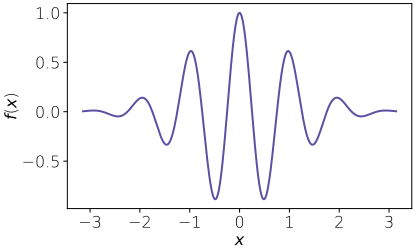

In [4]:
batchsize = 500
x = np.linspace(-π,π,batchsize)[:,np.newaxis]
y = f(x)

plt.plot(x,y[:,0])
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

<div class="span alert alert-success">
    <h4> 2. Setup your model and compile.  Use whatever architecture you like. </h4>
</div>

In [77]:
model = keras.Sequential(
    [
        layers.Dense(10,input_shape=(1,),activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(1, activation='linear'),
   ])

model.compile(loss='mean_squared_error', optimizer= 'adam')
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 10)                20        
                                                                 
 dense_96 (Dense)            (None, 10)                110       
                                                                 
 dense_97 (Dense)            (None, 10)                110       
                                                                 
 dense_98 (Dense)            (None, 10)                110       
                                                                 
 dense_99 (Dense)            (None, 10)                110       
                                                                 
 dense_100 (Dense)           (None, 10)                110       
                                                                 
 dense_101 (Dense)           (None, 10)              

<div class="span alert alert-success">
    <h4> 3. Prepare your data.  We need to do a manual train test split here. </h4>
    Can you think about why we need to do this instead of using <code>validation_split</code> as above? What other ways could you code this up?
</div>

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
#not exactly sure what random_state does so ill just keep it the same value as in a previous notebook

In [79]:
num_epochs = 64

history = model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), epochs=num_epochs, verbose=1)

Epoch 1/64
15/15 [==============================] - 1s 27ms/step - loss: 0.1476 - val_loss: 0.0810
Epoch 2/64
15/15 [==============================] - 0s 2ms/step - loss: 0.1472 - val_loss: 0.0810
Epoch 3/64
15/15 [==============================] - 0s 2ms/step - loss: 0.1470 - val_loss: 0.0808
Epoch 4/64
15/15 [==============================] - 0s 2ms/step - loss: 0.1459 - val_loss: 0.0805
Epoch 5/64
15/15 [==============================] - 0s 2ms/step - loss: 0.1439 - val_loss: 0.0800
Epoch 6/64
15/15 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.0788
Epoch 7/64
15/15 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.0783
Epoch 8/64
15/15 [==============================] - 0s 2ms/step - loss: 0.1221 - val_loss: 0.0752
Epoch 9/64
15/15 [==============================] - 0s 2ms/step - loss: 0.0991 - val_loss: 0.0626
Epoch 10/64
15/15 [==============================] - 0s 2ms/step - loss: 0.0670 - val_loss: 0.0411
Epoch 11/64
15/15 

<div class="span alert alert-success">
    <h4> 4. Examine the loss function.  Do you need to modify any hyperparameters?</h4>
</div>

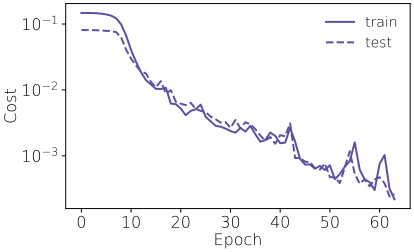

In [80]:
plt.semilogy(history.history['loss'], color=colors[0], label='train')
plt.semilogy(history.history['val_loss'], ls='--', color=colors[0], label='test')


plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.legend()

<div class="span alert alert-success">
    <h4> 5. How well did the network learn?</h4>
    Compare the prediction with the ground truth.  How well does it generalize outside of the learning domain?
</div>

If you are evaluating on a vector of inputs, don't forget to add a dimension `np.newaxis` to evaluate your model!

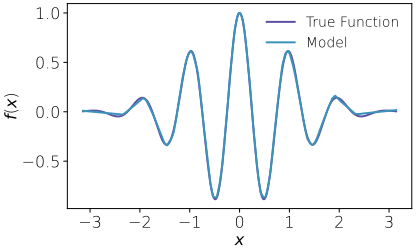

In [81]:
plt.plot(x,y[:,0],label = 'True Function')
plt.plot(x,model(x), label = 'Model')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

The topology looks really dumb but I didn't feel like getting creative with it and it works well enough.
I only tried relu and sigmoid for the inner networks. relu seemed to be better. Also, perhaps another gradient descent method would be more appropriate here. 